In [2]:
import vaex
import numpy as np
import math

import astropy.table as at
import astropy.coordinates as coord
import astropy.units as u
import h5py
import agama
import os
import gala.dynamics as gd
import gala.integrate as gi
import gala.potential as gp
import gala.coordinates as gc

In [5]:
df = vaex.open('asPIC_gaia_IDs.csv')

In [6]:
df

#,source_id
0,5188147152985808768
1,5764608588186152448
2,5188151340576027520
3,5764610821569159168
4,5764610344830418944
...,...
"2,675,534",576458385779028352
"2,675,535",1152919550398697984
"2,675,536",2305841256867043712
"2,675,537",1729380783738971392


In [3]:
ds = vaex.open('../../gaia/gaia-dr3/gaia-dr3-rv.hdf5')

In [7]:
_tmpdf = ds.join(df, on='source_id', rsuffix='_plato',allow_duplication=True)
newdf = _tmpdf[~_tmpdf.source_id_plato.isna()]

In [8]:
newdf

#,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,source_id_plato
0,1636148068921376768,Gaia DR3 2851858288640,2851858288640,187245224,2016.0,45.132144414036745,0.017589154,0.1378535532444834,0.014134296,2.676206624665436,0.018929554,141.37715,19.24554,4.722163881935847,0.023343084,18.657223456570797,0.016468382,-0.2062952,0.16326086,-0.2594169,0.22095163,-0.4571115,0.20854875,-0.18092339,-0.036596518,0.11352798,-0.11697136,193,193,193,0,4.0358205,437.79175,0.08982005,8.424436,31,True,1.5585552,nan,nan,nan,nan,nan,nan,nan,22,13,0.033212423,22,9,0,0.039942667,149.85532,0,0,1.213301,nan,nan,nan,nan,nan,nan,nan,nan,False,192,215004.47474807856,66.96533,3210.6833,12.356248,21,116134.06081922208,101.78037,1141.0261,12.676144,20,142183.1405743606,67.71681,2099.6726,11.865775,1.2014503,0.0,0.0,0.0,0.0,0.0,0.81036854,0.31989574,0.4904728,36.317192,1.722275,1.0,10.0,1.0,10.0,16.527525,0.63333726,0.19301076,911.2988,13.116074,5750.0,4.5,-1.0,101.0,nan,nan,nan,11.700247,0.019171432,9.0,nan,NOT_AVAILABLE,176.9497257815565,-48.71183912520122,42.70951943325065,-16.242931428672822,False,False,0,True,True,False,False,False,True,True,False,1.0313054e-13,5.1513183e-13,0.99989027,5819.5605,5784.0664,5863.0537,4.3388,4.3245,4.3741,-0.698,-0.734,-0.6524,363.0551,343.9236,370.3254,0.1242,0.1019,0.1499,0

In [12]:
ds_new = vaex.open('../../gaia/gaia-dr3/gaia-dr3.hdf5')

In [13]:
_tmpdf = ds.join(df, on='source_id', rsuffix='_plato',allow_duplication=True)
newdf0 = _tmpdf[~_tmpdf.source_id_plato.isna()]

In [14]:
newdf0

#,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,source_id_plato
0,1636148068921376768,Gaia DR3 2851858288640,2851858288640,187245224,2016.0,45.132144414036745,0.017589154,0.1378535532444834,0.014134296,2.676206624665436,0.018929554,141.37715,19.24554,4.722163881935847,0.023343084,18.657223456570797,0.016468382,-0.2062952,0.16326086,-0.2594169,0.22095163,-0.4571115,0.20854875,-0.18092339,-0.036596518,0.11352798,-0.11697136,193,193,193,0,4.0358205,437.79175,0.08982005,8.424436,31,True,1.5585552,nan,nan,nan,nan,nan,nan,nan,22,13,0.033212423,22,9,0,0.039942667,149.85532,0,0,1.213301,nan,nan,nan,nan,nan,nan,nan,nan,False,192,215004.47474807856,66.96533,3210.6833,12.356248,21,116134.06081922208,101.78037,1141.0261,12.676144,20,142183.1405743606,67.71681,2099.6726,11.865775,1.2014503,0.0,0.0,0.0,0.0,0.0,0.81036854,0.31989574,0.4904728,36.317192,1.722275,1.0,10.0,1.0,10.0,16.527525,0.63333726,0.19301076,911.2988,13.116074,5750.0,4.5,-1.0,101.0,nan,nan,nan,11.700247,0.019171432,9.0,nan,NOT_AVAILABLE,176.9497257815565,-48.71183912520122,42.70951943325065,-16.242931428672822,False,False,0,True,True,False,False,False,True,True,False,1.0313054e-13,5.1513183e-13,0.99989027,5819.5605,5784.0664,5863.0537,4.3388,4.3245,4.3741,-0.698,-0.734,-0.6524,363.0551,343.9236,370.3254,0.1242,0.1019,0.1499,0

In [19]:
newdf0.export('gaia_plato_targets.hdf5',progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :  4288.19s =  71.5m =  1.2h  
 

In [21]:
newdf0.export('gaia_plato_targets.csv',progress=True)

export(csv) [########################################] 100.00% elapsed time  :   221.71s =  3.7m =  0.1h
 

In [36]:
newdf0=vaex.open('gaia_plato_targets.hdf5')

In [37]:
df_gp = newdf0[(newdf0.parallax_over_error>5)&(newdf0.parallax>0)]

In [41]:
df_gp.export('gaia_plato_targets_good_parallax.hdf5',progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :    38.11s =  0.6m =  0.0h                                              
 

In [3]:
df_gp = vaex.open('gaia_plato_targets_good_parallax.hdf5')

In [4]:
galcen_frame = coord.Galactocentric(galcen_distance=8.2*u.kpc, galcen_v_sun=[11.1, 245.04, 7.25] * u.km/u.s)
c = coord.SkyCoord(
    df_gp.ra.values * u.deg,
    df_gp.dec.values * u.deg,
    distance=(1/df_gp.parallax.values) * u.kpc,
    pm_ra_cosdec=df_gp.pmra.values * u.mas/u.yr,
    pm_dec=df_gp.pmdec.values * u.mas/u.yr,
    radial_velocity=df_gp.radial_velocity.values * u.km/u.s
)
galcen = c.transform_to(galcen_frame)

In [5]:
with u.set_enabled_equivalencies(u.dimensionless_angles()):
    cyl = galcen.cylindrical
    apw_vphi = -(cyl.rho * cyl.differentials['s'].d_phi).to(u.km/u.s)
    vr = cyl.differentials['s'].d_rho.to(u.km/u.s).value
    vphi = -cyl.differentials['s'].d_phi.to(u.mas/u.yr).value*4.74047*cyl.rho.to(u.kpc).value
    vz = cyl.differentials['s'].d_z.to(u.km/u.s).value

In [6]:
df_gp['vr'] = vr
df_gp.add_column('vz',vz)
df_gp.add_column('vphi',vphi)

/net/gaia2/data/users/viswanathan/mambaforge/lib/python3.10/site-packages/vaex/viz/mpl.py:315: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


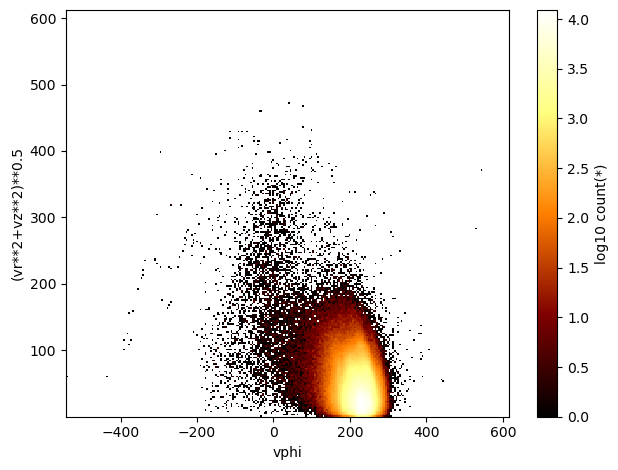

In [7]:
df_gp.plot('vphi','(vr**2+vz**2)**0.5',f='log10')

In [8]:
df_gp['vtoomre'] = vr**2 + (vphi-232)**2 + vz**2

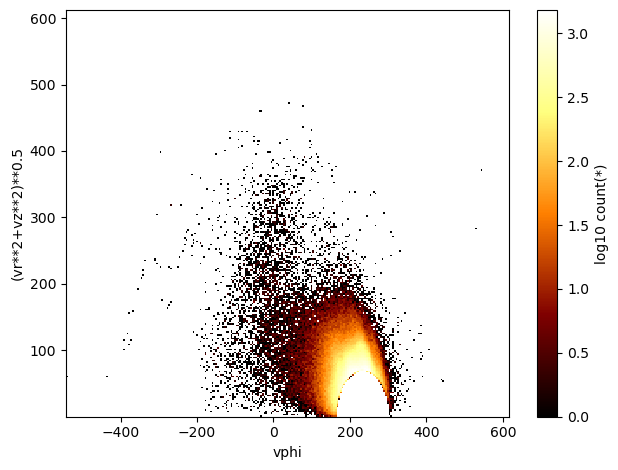

In [9]:
df_gp.plot('vphi','(vr**2+vz**2)**0.5',f='log10',selection='vtoomre>70**2')

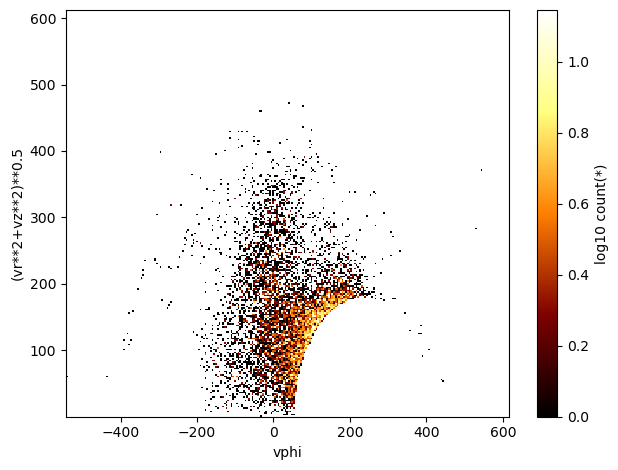

In [10]:
df_gp.plot('vphi','(vr**2+vz**2)**0.5',f='log10',selection='vtoomre>180**2')

In [17]:
def f(row):
    if row**2 < 70**2:
        val = 0
    elif row**2 < 180**2:
        val = 1
    else:
        val = 2
    return val

result = df_gp.apply(f, arguments = [df_gp.vtoomre])

In [18]:
df_gp['flag'] = result.values

In [19]:
df_gp

#,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,source_id_plato,vr,vz,vphi,vtoomre,flag
0,1636148068921376768,Gaia DR3 2851858288640,2851858288640,187245224,2016.0,45.132144414036745,0.017589154,0.1378535532444834,0.014134296,2.676206624665436,0.018929554,141.37715,19.24554,4.722163881935847,0.023343084,18.657223456570797,0.016468382,-0.2062952,0.16326086,-0.2594169,0.22095163,-0.4571115,0.20854875,-0.18092339,-0.036596518,0.11352798,-0.11697136,193,193,193,0,4.0358205,437.79175,0.08982005,8.424436,31,True,1.5585552,nan,nan,nan,nan,nan,nan,nan,22,13,0.033212423,22,9,0,0.039942667,149.85532,0,0,1.213301,nan,nan,nan,nan,nan,nan,nan,nan,False,192,215004.47474807856,66.96533,3210.6833,12.356248,21,116134.06081922208,101.78037,1141.0261,12.676144,20,142183.1405743606,67.71681,2099.6726,11.865775,1.2014503,0.0,0.0,0.0,0.0,0.0,0.81036854,0.31989574,0.4904728,36.317192,1.722275,1.0,10.0,1.0,10.0,16.527525,0.63333726,0.19301076,911.2988,13.116074,5750.0,4.5,-1.0,101.0,nan,nan,nan,11.700247,0.019171432,9.0,nan,NOT_AVAILABLE,176.9497257815565,-48.71183912520122,42.70951943325065,-16.242931428672822,False,False,0,True,True,False,False,False,True,True,False,1.0313054e-13,5.1513183e-13,0.99989027,5819.5605,5784.0664,5863.0537,4.3388,4.3245,4.3741,-0.698,-0.734,-0.6524,363.0551,343.9236,370.325

In [20]:
df_gp.export_csv('gaia_columns_plato_targets_classified_vMar24.csv', progress=True)

export(csv) [########################################] 100.00% elapsed time  :   211.27s =  3.5m =  0.1h
 

In [11]:
if (df_gp['vtoomre']**2 < 70**2):
    df_gp['thindisc'] = True
elif (df_gp['vtoomre']**2 < 180**2):
    df_gp['thickdisc'] = True
else:
    df_gp['halo'] = True

In [ ]:
df_gp

/net/gaia2/data/users/viswanathan/mambaforge/lib/python3.10/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


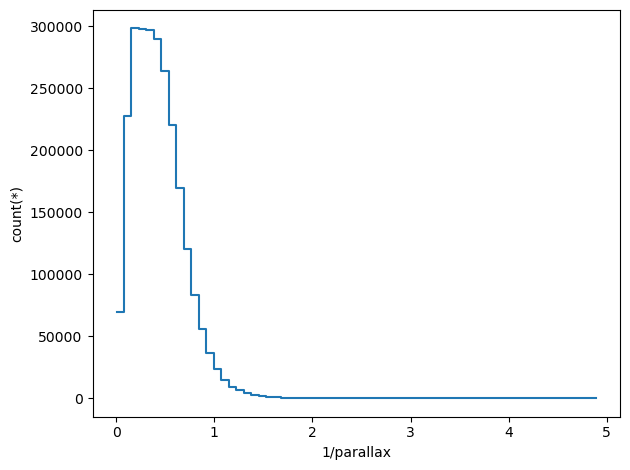

In [57]:
df_gp.plot1d('1/parallax')

In [60]:
df_gp['1/parallax'].max()

array(4.89073779)

In [62]:
df_gp['1/parallax'].count(selection='1/parallax>2.5')

array(120)